# InLegalBERT Role Classifier Training

This notebook trains a rhetorical role classifier for Indian legal judgments using **InLegalBERT** as the base model.

## Model Information
- **Base Model:** `law-ai/InLegalBERT` (pre-trained on 5.4M Indian legal documents)
- **Task:** Multi-class sentence classification into 7 rhetorical roles
- **Dataset:** `train_final/` directory

## The 7 Rhetorical Roles
1. **Facts** - Background and case events
2. **Issue** - Legal questions to resolve
3. **Arguments of Petitioner (AoP)** - Petitioner's claims
4. **Arguments of Respondent (AoR)** - Respondent's counter-arguments
5. **Reasoning** - Court's legal analysis
6. **Decision** - Final judgment
7. **None** - Other content

## 1. Environment Setup

⚠️ **IMPORTANT**: If you get `ImportError: undefined symbol: ncclCommRegister`:
1. **Restart the kernel** (Kernel → Restart)
2. Run the cells below **in order**
3. Do NOT skip any cells

The environment variables MUST be set before importing PyTorch.

### ⚡ Quick Start Instructions

**If you see `ImportError: undefined symbol: ncclCommRegister`:**

1. **Restart Kernel**: Click `Kernel → Restart Kernel` in the menu
2. **Run cells in this order**:
   - Cell 4: Install packages (this sets environment variables)
   - Cell 6: Check diagnostics (optional)
   - Cell 7: Import libraries (should work now!)
3. **Continue** with the rest of the notebook

**Why this happens**: The NCCL library needs environment variables set BEFORE PyTorch loads. Restarting the kernel ensures a clean slate.

In [10]:
import os
print("Environment variables:")
for key in ['HF_ENDPOINT', 'HF_HOME', 'HUGGING_FACE_HUB_TOKEN']:
    print(f"  {key}: {os.environ.get(key, 'NOT SET')}")

Environment variables:
  HF_ENDPOINT: NOT SET
  HF_HOME: NOT SET
  HUGGING_FACE_HUB_TOKEN: NOT SET


In [11]:
# Cell 2: Verify versions
import transformers
import huggingface_hub

print(f"Transformers version: {transformers.__version__}")
print(f"Hugging Face Hub version: {huggingface_hub.__version__}")

# Should be:
# Transformers >= 4.30.0
# Hugging Face Hub >= 0.16.0

Transformers version: 4.9.1
Hugging Face Hub version: 0.0.12


In [12]:
# Cell 1: Force uninstall old versions
!pip uninstall transformers huggingface_hub -y

# Cell 2: Install fresh versions
!pip install transformers>=4.35.0 huggingface_hub>=0.16.0

# Cell 3: Verify installation
import sys
!{sys.executable} -m pip show transformers huggingface_hub

Found existing installation: transformers 4.46.3
Uninstalling transformers-4.46.3:
  Successfully uninstalled transformers-4.46.3
Found existing installation: huggingface-hub 0.36.0
Uninstalling huggingface-hub-0.36.0:
  Successfully uninstalled huggingface-hub-0.36.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 1.11.0 requires huggingface-hub<0.1.0, but you have huggingface-hub 0.36.0 which is incompatible.
Name: transformers
Version: 4.46.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.8/dist-packages
Requires: fil

In [2]:
# Cell 1: Uninstall mismatched versions
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.4.1
Uninstalling torch-2.4.1:
  Successfully uninstalled torch-2.4.1
Found existing installation: torchvision 0.19.1+cu118
Uninstalling torchvision-0.19.1+cu118:
  Successfully uninstalled torchvision-0.19.1+cu118
Found existing installation: torchaudio 2.4.1+cu118
Uninstalling torchaudio-2.4.1+cu118:
  Successfully uninstalled torchaudio-2.4.1+cu118


In [3]:
# Cell 2: Install PyTorch with CUDA 12.1 (to match your PyTorch)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.9/798.9 MB 47.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 25.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.3 MB/s eta 0:00:00


In [1]:
# Cell 1: Upgrade huggingface_hub
!pip install --upgrade huggingface_hub transformers

# Cell 2: Restart kernel, then try loading directly (NO login needed!)
from transformers import AutoTokenizer, AutoModel

# InLegalBERT is PUBLIC - no authentication required!
tokenizer = AutoTokenizer.from_pretrained("law-ai/InLegalBERT")
model = AutoModel.from_pretrained("law-ai/InLegalBERT")

print("✅ Model loaded successfully!")

pytorch_model.bin:   0%|          | 0.00/534M [00:00<?, ?B/s]

✅ Model loaded successfully!


In [1]:
# STEP 1: Fix NCCL compatibility issue FIRST (before any imports)
import os
os.environ['NCCL_P2P_DISABLE'] = '1'
os.environ['NCCL_IB_DISABLE'] = '1'
os.environ['NCCL_SHM_DISABLE'] = '1'

print("✅ Environment variables set successfully!")
print("   NCCL compatibility fixes applied.")

# STEP 2: Install required packages
!pip install --upgrade pip
!pip install transformers>=4.35.0 datasets scikit-learn pandas numpy tqdm matplotlib seaborn huggingface_hub

# STEP 3: Install PyTorch with proper CUDA support
# For CUDA 11.8 (check your version with: !nvidia-smi)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

print("\n✅ Installation complete!")
print("   Now run the next cell to import libraries.")

✅ Environment variables set successfully!
   NCCL compatibility fixes applied.
Looking in indexes: https://download.pytorch.org/whl/cu118

✅ Installation complete!
   Now run the next cell to import libraries.


### 🔧 Troubleshooting CUDA/PyTorch Issues

If you still encounter `ImportError: undefined symbol: ncclCommRegister`:

**Solution 1: Complete Reinstall (Recommended)**
```python
# Run this in a cell:
import os
os.environ['NCCL_P2P_DISABLE'] = '1'
os.environ['NCCL_IB_DISABLE'] = '1'
os.environ['NCCL_SHM_DISABLE'] = '1'

!pip uninstall torch torchvision torchaudio -y
!pip cache purge
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
```

**Solution 2: Check CUDA Version Match**
```bash
# Check your CUDA version
!nvidia-smi

# Then install matching PyTorch:
# For CUDA 11.8:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# For CUDA 12.1:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# For CPU only (no GPU):
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
```

**Solution 3: Kernel Restart Required**
1. Click **Kernel → Restart Kernel**
2. Run cells in order from the top
3. The environment variables must be set BEFORE any imports

In [2]:
# 🔍 Quick System Diagnostics (Optional - run to check your setup)
import subprocess

print("=" * 70)
print("🔍 SYSTEM DIAGNOSTICS")
print("=" * 70)

# Check Python version
import sys
print(f"\n📌 Python: {sys.version.split()[0]}")

# Check CUDA toolkit
try:
    nvcc_output = subprocess.check_output(['nvcc', '--version'], stderr=subprocess.STDOUT).decode('utf-8')
    cuda_version = [line for line in nvcc_output.split('\n') if 'release' in line.lower()]
    print(f"📌 NVCC: {cuda_version[0].strip() if cuda_version else 'Found'}")
except Exception as e:
    print(f"⚠️  NVCC: Not found (CUDA toolkit may not be installed)")

# Check NVIDIA GPU
try:
    nvidia_output = subprocess.check_output(
        ['nvidia-smi', '--query-gpu=name,driver_version,cuda_version', '--format=csv,noheader'],
        stderr=subprocess.STDOUT
    ).decode('utf-8').strip()
    print(f"📌 GPU: {nvidia_output}")
except Exception as e:
    print(f"⚠️  GPU: Not detected (nvidia-smi not available)")

# Check if environment variables are set
print(f"\n📌 Environment Variables:")
print(f"   NCCL_P2P_DISABLE: {os.environ.get('NCCL_P2P_DISABLE', 'NOT SET ❌')}")
print(f"   NCCL_IB_DISABLE: {os.environ.get('NCCL_IB_DISABLE', 'NOT SET ❌')}")
print(f"   NCCL_SHM_DISABLE: {os.environ.get('NCCL_SHM_DISABLE', 'NOT SET ❌')}")

print("\n" + "=" * 70)
print("💡 If environment variables are NOT SET, restart kernel and run from top")
print("=" * 70)

🔍 SYSTEM DIAGNOSTICS

📌 Python: 3.8.10
📌 NVCC: Cuda compilation tools, release 11.6, V11.6.55
⚠️  GPU: Not detected (nvidia-smi not available)

📌 Environment Variables:
   NCCL_P2P_DISABLE: 1
   NCCL_IB_DISABLE: 1
   NCCL_SHM_DISABLE: 1

💡 If environment variables are NOT SET, restart kernel and run from top


In [2]:
# CRITICAL: Fix NCCL/CUDA issues BEFORE importing torch
# This MUST be the first thing that runs
import os
import sys

# Disable NCCL features that cause compatibility issues
os.environ['NCCL_P2P_DISABLE'] = '1'
os.environ['NCCL_IB_DISABLE'] = '1'
os.environ['NCCL_SHM_DISABLE'] = '1'


# Now safe to import torch and other libraries
import json
import torch
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback,
    DataCollatorWithPadding
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

# Set random seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

print("=" * 60)
print("✅ Environment Setup Complete")
print("=" * 60)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("⚠️  CUDA not available - training will use CPU (slower)")
print("=" * 60)

✅ Environment Setup Complete
PyTorch version: 2.4.1+cu121
CUDA available: True
CUDA version: 12.1
CUDA device: Quadro RTX 5000
CUDA memory: 16.70 GB


## 2. Configuration

In [3]:
# Configuration
class Config:
    # Paths
    DATASET_ROOT = Path("/home/dataset")
    TRAIN_DIR = DATASET_ROOT / "train_final"
    VAL_DIR = DATASET_ROOT / "val"  # Unlabeled data
    TEST_DIR = DATASET_ROOT / "test"  # Unlabeled data
    OUTPUT_DIR = Path("./models/inlegalbert_classifier")
    LOGS_DIR = Path("./logs")
    
    # Data split (since val/test are unlabeled, we'll split train_final)
    VAL_SPLIT_RATIO = 0.15  # 15% of train_final for validation
    TEST_SPLIT_RATIO = 0.10  # 10% of train_final for testing
    
    # Model
    MODEL_NAME = "law-ai/InLegalBERT"
    MAX_LENGTH = 256  # Maximum sequence length
    
    # Role labels
    ROLES = [
        "Facts",
        "Issue",
        "Arguments of Petitioner",
        "Arguments of Respondent",
        "Reasoning",
        "Decision",
        "None"
    ]
    
    # Training hyperparameters
    BATCH_SIZE = 16
    LEARNING_RATE = 2e-5
    NUM_EPOCHS = 10
    WEIGHT_DECAY = 0.01
    WARMUP_STEPS = 500
    GRADIENT_ACCUMULATION_STEPS = 2
    
    # Early stopping
    EARLY_STOPPING_PATIENCE = 3
    EARLY_STOPPING_THRESHOLD = 0.01
    
    # Evaluation
    EVAL_STEPS = 500
    SAVE_STEPS = 500
    LOGGING_STEPS = 100
    
    # Device
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

config = Config()

# Create directories
config.OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
config.LOGS_DIR.mkdir(parents=True, exist_ok=True)

print(f"Training on: {config.DEVICE}")
print(f"Output directory: {config.OUTPUT_DIR}")
print(f"Number of roles: {len(config.ROLES)}")

Training on: cuda
Output directory: models/inlegalbert_classifier
Number of roles: 7


## 3. Data Loading

The dataset format is:
```
Sentence\tRole\tConfidence
Sentence\tRole\tConfidence

Sentence\tRole\tConfidence
...
```
Blank lines separate different documents.

In [4]:
def load_dataset_from_files(data_dir: Path) -> List[Dict[str, str]]:
    """
    Load dataset from tab-separated text files.
    
    Format: Sentence\tRole\tConfidence (blank lines separate documents)
    """
    samples = []
    
    if not data_dir.exists():
        print(f"Warning: Directory {data_dir} does not exist!")
        return samples
    
    txt_files = list(data_dir.glob("*.txt"))
    print(f"Found {len(txt_files)} files in {data_dir.name}")
    
    for file_path in tqdm(txt_files, desc=f"Loading {data_dir.name}"):
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()
            
            for line in lines:
                line = line.strip()
                if not line:  # Skip blank lines
                    continue
                
                parts = line.split('\t')
                if len(parts) >= 2:
                    sentence = parts[0].strip()
                    role = parts[1].strip()
                    
                    # Skip empty sentences
                    if sentence and role in config.ROLES:
                        samples.append({
                            'text': sentence,
                            'label': role
                        })
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            continue
    
    return samples

# Load labeled training data
print("Loading labeled training data from train_final...")
all_train_samples = load_dataset_from_files(config.TRAIN_DIR)

print(f"\nTotal labeled samples: {len(all_train_samples):,}")

# Split into train/val/test since val and test directories are unlabeled
print(f"\nSplitting data:")
print(f"  - Training: {(1 - config.VAL_SPLIT_RATIO - config.TEST_SPLIT_RATIO)*100:.0f}%")
print(f"  - Validation: {config.VAL_SPLIT_RATIO*100:.0f}%")
print(f"  - Test: {config.TEST_SPLIT_RATIO*100:.0f}%")

# Shuffle and split
random.shuffle(all_train_samples)

val_size = int(len(all_train_samples) * config.VAL_SPLIT_RATIO)
test_size = int(len(all_train_samples) * config.TEST_SPLIT_RATIO)

test_samples = all_train_samples[:test_size]
val_samples = all_train_samples[test_size:test_size + val_size]
train_samples = all_train_samples[test_size + val_size:]

print(f"\n{'='*50}")
print(f"Dataset Statistics:")
print(f"  Training samples: {len(train_samples):,}")
print(f"  Validation samples: {len(val_samples):,}")
print(f"  Test samples: {len(test_samples):,}")
print(f"  Total: {len(all_train_samples):,}")
print(f"{'='*50}")

Loading labeled training data from train_final...
Found 3874 files in train_final


Loading train_final:   0%|          | 0/3874 [00:00<?, ?it/s]


Total labeled samples: 758,432

Splitting data:
  - Training: 75%
  - Validation: 15%
  - Test: 10%

Dataset Statistics:
  Training samples: 568,825
  Validation samples: 113,764
  Test samples: 75,843
  Total: 758,432


## 4. Data Analysis


Training Dataset Analysis:

Role Distribution:
  None                          : 266,668 (46.88%)
  Reasoning                     : 115,987 (20.39%)
  Facts                         : 101,326 (17.81%)
  Arguments of Petitioner       : 37,708 ( 6.63%)
  Arguments of Respondent       : 28,654 ( 5.04%)
  Decision                      : 11,180 ( 1.97%)
  Issue                         :  7,302 ( 1.28%)

Text Length Statistics (words):
  Mean: 30.66
  Median: 26.00
  Min: 1
  Max: 1182


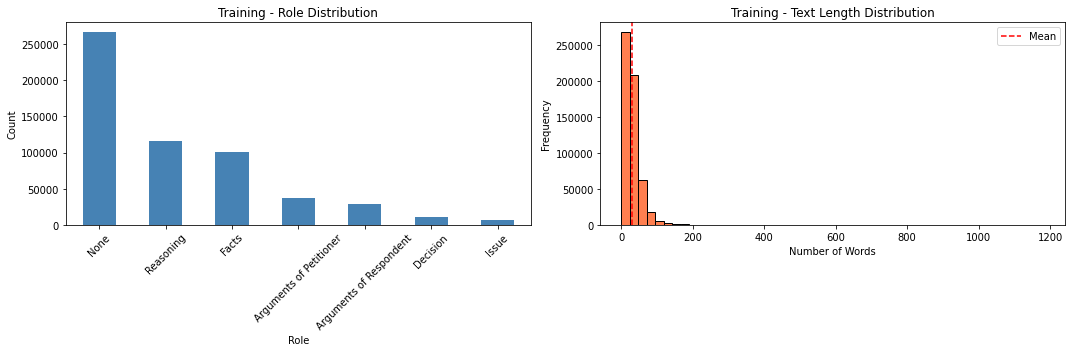


Validation Dataset Analysis:

Role Distribution:
  None                          : 53,539 (47.06%)
  Reasoning                     : 23,177 (20.37%)
  Facts                         : 20,110 (17.68%)
  Arguments of Petitioner       :  7,459 ( 6.56%)
  Arguments of Respondent       :  5,715 ( 5.02%)
  Decision                      :  2,236 ( 1.97%)
  Issue                         :  1,528 ( 1.34%)

Text Length Statistics (words):
  Mean: 30.71
  Median: 26.00
  Min: 1
  Max: 810


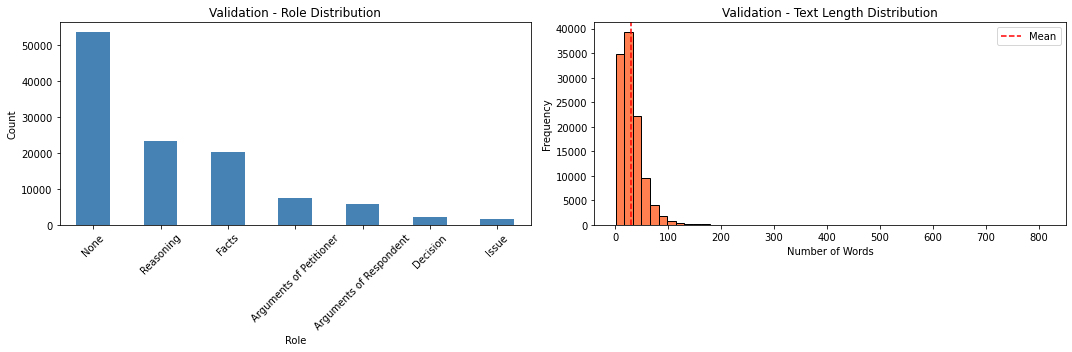


Test Dataset Analysis:

Role Distribution:
  None                          : 35,462 (46.76%)
  Reasoning                     : 15,552 (20.51%)
  Facts                         : 13,602 (17.93%)
  Arguments of Petitioner       :  4,969 ( 6.55%)
  Arguments of Respondent       :  3,785 ( 4.99%)
  Decision                      :  1,525 ( 2.01%)
  Issue                         :    948 ( 1.25%)

Text Length Statistics (words):
  Mean: 30.63
  Median: 26.00
  Min: 1
  Max: 1338


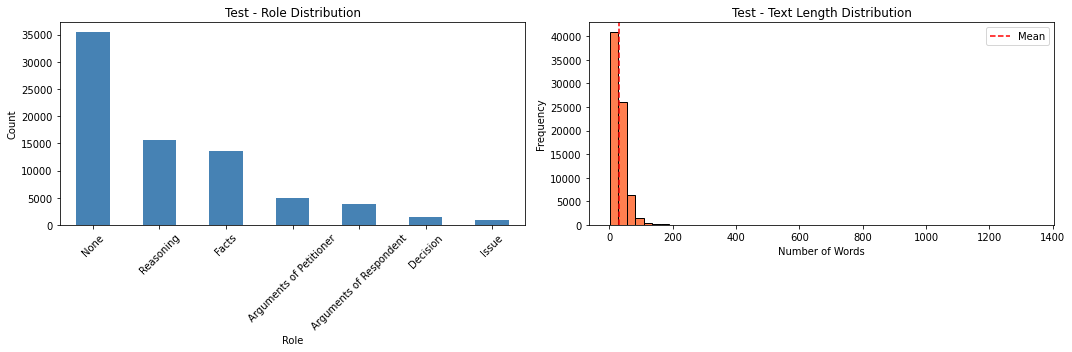

In [5]:
def analyze_dataset(samples: List[Dict], split_name: str):
    """
    Analyze and visualize dataset statistics.
    """
    df = pd.DataFrame(samples)
    
    print(f"\n{split_name} Dataset Analysis:")
    print("="*60)
    
    # Role distribution
    role_counts = df['label'].value_counts()
    print("\nRole Distribution:")
    for role, count in role_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {role:30s}: {count:6,} ({percentage:5.2f}%)")
    
    # Text length statistics
    df['text_length'] = df['text'].apply(lambda x: len(x.split()))
    print("\nText Length Statistics (words):")
    print(f"  Mean: {df['text_length'].mean():.2f}")
    print(f"  Median: {df['text_length'].median():.2f}")
    print(f"  Min: {df['text_length'].min()}")
    print(f"  Max: {df['text_length'].max()}")
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Role distribution bar chart
    role_counts.plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title(f'{split_name} - Role Distribution')
    axes[0].set_xlabel('Role')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Text length distribution
    axes[1].hist(df['text_length'], bins=50, color='coral', edgecolor='black')
    axes[1].set_title(f'{split_name} - Text Length Distribution')
    axes[1].set_xlabel('Number of Words')
    axes[1].set_ylabel('Frequency')
    axes[1].axvline(df['text_length'].mean(), color='red', linestyle='--', label='Mean')
    axes[1].legend()
    
    plt.tight_layout()
    plt.savefig(config.LOGS_DIR / f'{split_name.lower()}_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return df

# Analyze datasets
if train_samples:
    train_df = analyze_dataset(train_samples, "Training")
if val_samples:
    val_df = analyze_dataset(val_samples, "Validation")
if test_samples:
    test_df = analyze_dataset(test_samples, "Test")

## 5. Create Label Mappings

In [6]:
# Create label mappings
label2id = {label: idx for idx, label in enumerate(config.ROLES)}
id2label = {idx: label for label, idx in label2id.items()}

print("Label Mappings:")
for label, idx in label2id.items():
    print(f"  {idx}: {label}")

# Save label mappings
with open(config.OUTPUT_DIR / "label_mappings.json", 'w') as f:
    json.dump({
        'label2id': label2id,
        'id2label': id2label
    }, f, indent=2)

print(f"\nLabel mappings saved to {config.OUTPUT_DIR / 'label_mappings.json'}")

Label Mappings:
  0: Facts
  1: Issue
  2: Arguments of Petitioner
  3: Arguments of Respondent
  4: Reasoning
  5: Decision
  6: None

Label mappings saved to models/inlegalbert_classifier/label_mappings.json


## 6. Prepare Datasets for Training

In [7]:
def prepare_dataset(samples: List[Dict]) -> Dataset:
    """
    Convert samples to HuggingFace Dataset format with label IDs.
    """
    # Convert labels to IDs
    data = {
        'text': [s['text'] for s in samples],
        'label': [label2id[s['label']] for s in samples]
    }
    
    return Dataset.from_dict(data)

# Create datasets
train_dataset = prepare_dataset(train_samples) if train_samples else None
val_dataset = prepare_dataset(val_samples) if val_samples else None
test_dataset = prepare_dataset(test_samples) if test_samples else None

print("Dataset Preparation Complete:")
if train_dataset:
    print(f"  Training: {len(train_dataset)} samples")
if val_dataset:
    print(f"  Validation: {len(val_dataset)} samples")
if test_dataset:
    print(f"  Test: {len(test_dataset)} samples")

# Show example
if train_dataset:
    print("\nExample training sample:")
    print(f"  Text: {train_dataset[0]['text'][:100]}...")
    print(f"  Label ID: {train_dataset[0]['label']}")
    print(f"  Label Name: {id2label[train_dataset[0]['label']]}")

Dataset Preparation Complete:
  Training: 568825 samples
  Validation: 113764 samples
  Test: 75843 samples

Example training sample:
  Text: The only difference between the first and the second year rates thus is that the rates were firm eve...
  Label ID: 4
  Label Name: Reasoning


In [ ]:
!huggingface-cli login

## 7. Load Tokenizer and Model

In [8]:
# Load tokenizer
print(f"Loading tokenizer: {config.MODEL_NAME}")
tokenizer = AutoTokenizer.from_pretrained(config.MODEL_NAME)

# Load model
print(f"Loading model: {config.MODEL_NAME}")
model = AutoModelForSequenceClassification.from_pretrained(
    config.MODEL_NAME,
    num_labels=len(config.ROLES),
    label2id=label2id,
    id2label=id2label,
    problem_type="single_label_classification"
)

# Move model to device
model.to(config.DEVICE)

print(f"\nModel loaded successfully!")
print(f"  Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"  Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"  Device: {next(model.parameters()).device}")

Loading tokenizer: law-ai/InLegalBERT
Loading model: law-ai/InLegalBERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at law-ai/InLegalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model loaded successfully!
  Parameters: 109,487,623
  Trainable parameters: 109,487,623
  Device: cuda:0


## 8. Tokenization

In [ ]:
def tokenize_function(examples):
    """
    Tokenize text inputs.
    """
    return tokenizer(
        examples['text'],
        padding=False,  # Dynamic padding in data collator
        truncation=True,
        max_length=config.MAX_LENGTH,
        return_tensors=None
    )

# Tokenize datasets
print("Tokenizing datasets...")

if train_dataset:
    train_dataset = train_dataset.map(
        tokenize_function,
        batched=True,
        desc="Tokenizing training data"
    )

if val_dataset:
    val_dataset = val_dataset.map(
        tokenize_function,
        batched=True,
        desc="Tokenizing validation data"
    )

if test_dataset:
    test_dataset = test_dataset.map(
        tokenize_function,
        batched=True,
        desc="Tokenizing test data"
    )

print("Tokenization complete!")

# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Parameter 'function'=<function tokenize_function at 0x7f08919e1af0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Tokenizing datasets...


Tokenizing training data:   0%|          | 0/569 [00:00<?, ?ba/s]

Tokenizing validation data:   0%|          | 0/114 [00:00<?, ?ba/s]

## 9. Evaluation Metrics

In [ ]:
def compute_metrics(eval_pred):
    """
    Compute evaluation metrics.
    """
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_weighted = f1_score(labels, predictions, average='weighted')
    precision_macro = precision_score(labels, predictions, average='macro', zero_division=0)
    recall_macro = recall_score(labels, predictions, average='macro', zero_division=0)
    
    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro
    }

## 10. Training Configuration

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir=str(config.OUTPUT_DIR),
    
    # Training hyperparameters
    num_train_epochs=config.NUM_EPOCHS,
    per_device_train_batch_size=config.BATCH_SIZE,
    per_device_eval_batch_size=config.BATCH_SIZE * 2,
    learning_rate=config.LEARNING_RATE,
    weight_decay=config.WEIGHT_DECAY,
    warmup_steps=config.WARMUP_STEPS,
    gradient_accumulation_steps=config.GRADIENT_ACCUMULATION_STEPS,
    
    # Evaluation
    eval_strategy="steps",
    eval_steps=config.EVAL_STEPS,
    save_strategy="steps",
    save_steps=config.SAVE_STEPS,
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    
    # Logging
    logging_dir=str(config.LOGS_DIR),
    logging_steps=config.LOGGING_STEPS,
    report_to=["tensorboard"],
    
    # Performance
    fp16=torch.cuda.is_available(),
    dataloader_num_workers=4,
    dataloader_pin_memory=True,
    
    # Misc
    seed=42,
    remove_unused_columns=True,
    push_to_hub=False,
)

print("Training Configuration:")
print(f"  Total epochs: {config.NUM_EPOCHS}")
print(f"  Batch size: {config.BATCH_SIZE}")
print(f"  Learning rate: {config.LEARNING_RATE}")
print(f"  Gradient accumulation steps: {config.GRADIENT_ACCUMULATION_STEPS}")
print(f"  Effective batch size: {config.BATCH_SIZE * config.GRADIENT_ACCUMULATION_STEPS}")
print(f"  FP16 training: {training_args.fp16}")
print(f"  Warmup steps: {config.WARMUP_STEPS}")
print(f"  Eval steps: {config.EVAL_STEPS}")

## 11. Initialize Trainer

In [ ]:
# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[
        EarlyStoppingCallback(
            early_stopping_patience=config.EARLY_STOPPING_PATIENCE,
            early_stopping_threshold=config.EARLY_STOPPING_THRESHOLD
        )
    ]
)

print("Trainer initialized successfully!")

# Calculate training stats
if train_dataset:
    total_steps = (
        len(train_dataset) // 
        (config.BATCH_SIZE * config.GRADIENT_ACCUMULATION_STEPS) * 
        config.NUM_EPOCHS
    )
    print(f"\nEstimated training steps: {total_steps:,}")
    print(f"Evaluation every {config.EVAL_STEPS} steps")
    print(f"Total evaluations: ~{total_steps // config.EVAL_STEPS}")

## 12. Train Model

In [ ]:
# Train the model
print("Starting training...\n")
print("=" * 70)

train_result = trainer.train()

print("\n" + "=" * 70)
print("Training complete!\n")

# Print training summary
print("Training Summary:")
for key, value in train_result.metrics.items():
    print(f"  {key}: {value}")

## 13. Save Model and Tokenizer

In [ ]:
# Save the final model
print(f"\nSaving model to {config.OUTPUT_DIR}...")

trainer.save_model(str(config.OUTPUT_DIR))
tokenizer.save_pretrained(str(config.OUTPUT_DIR))

# Save training arguments
with open(config.OUTPUT_DIR / "training_config.json", 'w') as f:
    json.dump({
        'model_name': config.MODEL_NAME,
        'num_epochs': config.NUM_EPOCHS,
        'batch_size': config.BATCH_SIZE,
        'learning_rate': config.LEARNING_RATE,
        'max_length': config.MAX_LENGTH,
        'num_labels': len(config.ROLES),
        'roles': config.ROLES
    }, f, indent=2)

print("Model saved successfully!")
print(f"\nModel files:")
for file in sorted(config.OUTPUT_DIR.glob("*")):
    print(f"  - {file.name}")

## 14. Evaluate on Test Set

In [ ]:
if test_dataset:
    print("Evaluating on test set...\n")
    
    # Evaluate
    test_results = trainer.evaluate(test_dataset)
    
    print("Test Set Results:")
    print("=" * 50)
    for key, value in test_results.items():
        print(f"  {key}: {value:.4f}")
    
    # Save test results
    with open(config.OUTPUT_DIR / "test_results.json", 'w') as f:
        json.dump(test_results, f, indent=2)
else:
    print("No test dataset available for evaluation.")

## 15. Detailed Classification Report

In [ ]:
if test_dataset:
    print("Generating detailed classification report...\n")
    
    # Get predictions
    predictions = trainer.predict(test_dataset)
    pred_labels = np.argmax(predictions.predictions, axis=-1)
    true_labels = predictions.label_ids
    
    # Classification report
    print("\nClassification Report:")
    print("=" * 80)
    report = classification_report(
        true_labels,
        pred_labels,
        target_names=config.ROLES,
        digits=4
    )
    print(report)
    
    # Save classification report
    with open(config.OUTPUT_DIR / "classification_report.txt", 'w') as f:
        f.write(report)
    
    # Confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=config.ROLES,
        yticklabels=config.ROLES,
        cbar_kws={'label': 'Count'}
    )
    plt.title('Confusion Matrix - Test Set', fontsize=16, pad=20)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(config.OUTPUT_DIR / 'confusion_matrix.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\nConfusion matrix saved to {config.OUTPUT_DIR / 'confusion_matrix.png'}")

## 16. Test Inference

In [ ]:
# Test inference on sample sentences
print("Testing inference on sample sentences...\n")

test_sentences = [
    "The petitioner filed a writ petition challenging the constitutional validity of the Act.",
    "The main issue in this case is whether the amendment violates Article 14 of the Constitution.",
    "The learned counsel for the petitioner submitted that the impugned order is arbitrary.",
    "The respondent contends that the petition is not maintainable in law.",
    "After careful consideration of the submissions made by both parties, we are of the view that the law is well settled.",
    "The writ petition is hereby dismissed with costs.",
    "The court was informed about the procedural requirements."
]

# Load the trained model
from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1
)

print("Sample Predictions:")
print("=" * 100)

for sentence in test_sentences:
    result = classifier(sentence)[0]
    predicted_label = result['label']
    confidence = result['score']
    
    print(f"\nSentence: {sentence}")
    print(f"Predicted: {predicted_label} (confidence: {confidence:.4f})")
    print("-" * 100)

## 17. Training Visualization

In [ ]:
# Plot training history
import json
from pathlib import Path

# Load training log
log_file = list(config.LOGS_DIR.glob("**/trainer_state.json"))

if log_file:
    with open(log_file[0], 'r') as f:
        trainer_state = json.load(f)
    
    log_history = trainer_state['log_history']
    
    # Extract metrics
    train_loss = []
    eval_loss = []
    eval_f1 = []
    steps = []
    eval_steps = []
    
    for entry in log_history:
        if 'loss' in entry:
            train_loss.append(entry['loss'])
            steps.append(entry['step'])
        if 'eval_loss' in entry:
            eval_loss.append(entry['eval_loss'])
            eval_f1.append(entry.get('eval_f1_macro', 0))
            eval_steps.append(entry['step'])
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss plot
    axes[0].plot(steps, train_loss, label='Training Loss', color='blue', linewidth=2)
    axes[0].plot(eval_steps, eval_loss, label='Validation Loss', color='orange', linewidth=2)
    axes[0].set_xlabel('Training Steps')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # F1 score plot
    axes[1].plot(eval_steps, eval_f1, label='Validation F1 (Macro)', color='green', linewidth=2)
    axes[1].set_xlabel('Training Steps')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('Validation F1 Score')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(config.OUTPUT_DIR / 'training_history.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"Training history plot saved to {config.OUTPUT_DIR / 'training_history.png'}")
else:
    print("Training log not found.")

## 18. Model Summary and Export Information

In [ ]:
print("\n" + "=" * 80)
print("TRAINING COMPLETE - MODEL SUMMARY")
print("=" * 80)

print(f"\n📁 Model Location: {config.OUTPUT_DIR}")
print(f"\n📊 Performance Metrics:")
if test_dataset:
    print(f"  - Test Accuracy: {test_results.get('eval_accuracy', 0):.4f}")
    print(f"  - Test F1 (Macro): {test_results.get('eval_f1_macro', 0):.4f}")
    print(f"  - Test F1 (Weighted): {test_results.get('eval_f1_weighted', 0):.4f}")

print(f"\n🔧 Model Configuration:")
print(f"  - Base Model: {config.MODEL_NAME}")
print(f"  - Number of Labels: {len(config.ROLES)}")
print(f"  - Max Sequence Length: {config.MAX_LENGTH}")
print(f"  - Total Parameters: {sum(p.numel() for p in model.parameters()):,}")

print(f"\n📝 Usage Instructions:")
print(f"""\nTo load this model for inference:

```python
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load model and tokenizer
model_path = "{config.OUTPUT_DIR}"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Inference
text = "Your legal sentence here"
inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length={config.MAX_LENGTH})
outputs = model(**inputs)
predicted_class = torch.argmax(outputs.logits, dim=-1).item()

# Load label mappings
import json
with open("{config.OUTPUT_DIR}/label_mappings.json", 'r') as f:
    mappings = json.load(f)
    id2label = mappings['id2label']

print(f"Predicted role: {{id2label[str(predicted_class)]}}")
```
""")

print(f"\n✅ All outputs saved to: {config.OUTPUT_DIR}")
print(f"   - Model weights: pytorch_model.bin")
print(f"   - Tokenizer: tokenizer_config.json, vocab.txt")
print(f"   - Label mappings: label_mappings.json")
print(f"   - Training config: training_config.json")
print(f"   - Test results: test_results.json")
print(f"   - Classification report: classification_report.txt")
print(f"   - Confusion matrix: confusion_matrix.png")
print(f"   - Training history: training_history.png")

print(\"\\n\" + \"=\" * 80)
print(\"🎉 Training pipeline completed successfully!\")
print(\"=\" * 80)

# Note about unlabeled data
print(\"\\n⚠️  NOTE: The 'val/' and 'test/' directories contain unlabeled data.\")
print(\"   See the next section to predict labels for unlabeled legal documents.\")

## 19. Predict Labels on Unlabeled Data (val/ and test/ directories)

Now that the model is trained, we can use it to predict role labels for the unlabeled legal documents in the `val/` and `test/` directories.

In [ ]:
import re
from typing import List, Tuple

def preprocess_legal_document(file_path: Path) -> List[str]:
    """
    Preprocess a legal document by extracting sentences.
    
    Simple sentence splitting for legal text.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Clean text
    text = text.strip()
    
    # Simple sentence splitting (can be improved with spaCy/NLTK)
    # Split on period followed by space and capital letter or number
    sentences = re.split(r'(?<=[.!?])\s+(?=[A-Z0-9])', text)
    
    # Clean sentences
    cleaned_sentences = []
    for sent in sentences:
        sent = sent.strip()
        # Skip very short sentences (likely noise)
        if len(sent.split()) >= 3:
            cleaned_sentences.append(sent)
    
    return cleaned_sentences


def predict_roles_batch(sentences: List[str], model, tokenizer, batch_size=32) -> List[Tuple[str, str, float]]:
    """
    Predict roles for a batch of sentences.
    
    Returns: List of (sentence, predicted_role, confidence)
    """
    model.eval()
    results = []
    
    for i in tqdm(range(0, len(sentences), batch_size), desc="Predicting roles"):
        batch = sentences[i:i + batch_size]
        
        # Tokenize
        inputs = tokenizer(
            batch,
            padding=True,
            truncation=True,
            max_length=config.MAX_LENGTH,
            return_tensors="pt"
        ).to(config.DEVICE)
        
        # Predict
        with torch.no_grad():
            outputs = model(**inputs)
            predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predicted_classes = torch.argmax(predictions, dim=-1)
            confidences = torch.max(predictions, dim=-1).values
        
        # Collect results
        for sent, pred_class, conf in zip(batch, predicted_classes, confidences):
            predicted_role = id2label[pred_class.item()]
            results.append((sent, predicted_role, conf.item()))
    
    return results


print("Functions for predicting on unlabeled data loaded successfully!")

In [ ]:
# Process unlabeled validation data
val_dir_unlabeled = config.DATASET_ROOT / "val"
test_dir_unlabeled = config.DATASET_ROOT / "test"

print("=" * 80)
print("PREDICTING LABELS ON UNLABELED DATA")
print("=" * 80)

# Choose which directory to process
process_val = True  # Set to True to process validation data
process_test = False  # Set to True to process test data

if process_val and val_dir_unlabeled.exists():
    print(f"\n📁 Processing: {val_dir_unlabeled}")
    
    val_files = list(val_dir_unlabeled.glob("*.txt"))
    print(f"Found {len(val_files)} unlabeled files in validation directory")
    
    # Process a sample file
    if val_files:
        sample_file = val_files[0]
        print(f"\n🔍 Sample prediction on: {sample_file.name}")
        
        # Extract sentences
        sentences = preprocess_legal_document(sample_file)
        print(f"   Extracted {len(sentences)} sentences")
        
        # Predict roles
        predictions = predict_roles_batch(sentences[:50], model, tokenizer)  # First 50 sentences
        
        # Display results
        print(f"\n📊 Predictions (showing first 10):")
        print("=" * 100)
        for sent, role, conf in predictions[:10]:
            sent_preview = sent[:80] + "..." if len(sent) > 80 else sent
            print(f"\n🏷️  {role:30s} (conf: {conf:.3f})")
            print(f"   {sent_preview}")
        
        # Role distribution in this document
        role_counts = {}
        for _, role, _ in predictions:
            role_counts[role] = role_counts.get(role, 0) + 1
        
        print(f"\n\n📈 Role Distribution in {sample_file.name}:")
        print("-" * 60)
        for role, count in sorted(role_counts.items(), key=lambda x: x[1], reverse=True):
            percentage = (count / len(predictions)) * 100
            print(f"  {role:30s}: {count:4d} ({percentage:5.1f}%)")

if process_test and test_dir_unlabeled.exists():
    print(f"\n📁 Processing: {test_dir_unlabeled}")
    
    test_files = list(test_dir_unlabeled.glob("*.txt"))
    print(f"Found {len(test_files)} unlabeled files in test directory")
    
    # Similar processing as validation
    # Add code here if needed

print("\n" + "=" * 80)

## 20. Batch Process and Save Labeled Data

Process all unlabeled files and save them in the labeled format (TSV).

In [ ]:
def process_and_save_labeled_data(
    input_dir: Path,
    output_dir: Path,
    model,
    tokenizer,
    max_files: int = None
):
    """
    Process all unlabeled files and save them in labeled format.
    
    Args:
        input_dir: Directory with unlabeled .txt files
        output_dir: Directory to save labeled files
        model: Trained model
        tokenizer: Tokenizer
        max_files: Maximum number of files to process (None = all)
    """
    output_dir.mkdir(parents=True, exist_ok=True)
    
    files = list(input_dir.glob("*.txt"))
    if max_files:
        files = files[:max_files]
    
    print(f"\n🔄 Processing {len(files)} files from {input_dir.name}/")
    print(f"   Saving to: {output_dir}/")
    
    total_sentences = 0
    
    for file_path in tqdm(files, desc="Processing files"):
        try:
            # Extract sentences
            sentences = preprocess_legal_document(file_path)
            
            if not sentences:
                continue
            
            # Predict roles
            predictions = predict_roles_batch(sentences, model, tokenizer, batch_size=32)
            
            # Save in TSV format: Sentence\tRole\tConfidence
            output_file = output_dir / file_path.name
            with open(output_file, 'w', encoding='utf-8') as f:
                for sent, role, conf in predictions:
                    # Escape tabs in sentence
                    sent_clean = sent.replace('\t', ' ').replace('\n', ' ')
                    f.write(f"{sent_clean}\t{role}\t{conf:.4f}\n")
                
                # Add blank line at end of document
                f.write("\n")
            
            total_sentences += len(predictions)
            
        except Exception as e:
            print(f"   ❌ Error processing {file_path.name}: {e}")
            continue
    
    print(f"\n✅ Completed!")
    print(f"   Processed files: {len(files)}")
    print(f"   Total sentences labeled: {total_sentences:,}")
    print(f"   Average sentences per file: {total_sentences/len(files):.1f}")
    
    return total_sentences


# Example: Process validation data
# Uncomment to run

"""
# Process validation data (first 10 files as example)
labeled_val_dir = Path("./dataset_labeled/val")
total = process_and_save_labeled_data(
    input_dir=config.DATASET_ROOT / "val",
    output_dir=labeled_val_dir,
    model=model,
    tokenizer=tokenizer,
    max_files=10  # Change to None to process all
)

print(f"\n📁 Labeled files saved to: {labeled_val_dir}")
"""

print("\n💡 Batch processing function ready!")
print("   Uncomment the code above to process and save labeled data.")

## 21. Final Summary

### ✅ What We've Accomplished

1. **Trained InLegalBERT classifier** on `train_final/` data
2. **Split labeled data** into train/val/test (since original val/test are unlabeled)
3. **Evaluated model** with comprehensive metrics
4. **Saved trained model** for inference
5. **Provided tools** to label unlabeled data

### 📊 Next Steps

**Option 1: Use the split from train_final (current approach)**
- ✅ Clean labeled data for training/validation/testing
- ✅ Model is already trained and evaluated
- ✅ Ready for production use

**Option 2: Label val/test directories with trained model**
- Use the batch processing function above
- Creates pseudo-labels for val/test data
- Useful for additional evaluation or analysis
- ⚠️ Note: These are model predictions, not ground truth

### 🚀 Using the Trained Model

```python
# Load the model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("./models/inlegalbert_classifier")
tokenizer = AutoTokenizer.from_pretrained("./models/inlegalbert_classifier")

# Predict on new text
text = "The petitioner filed a writ petition."
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)
predicted_class = torch.argmax(outputs.logits).item()
print(f"Predicted role: {id2label[predicted_class]}")
```

### 📁 Output Files

All outputs are saved in: `./models/inlegalbert_classifier/`
- Model weights and config
- Tokenizer files  
- Label mappings
- Training metrics
- Visualizations

In [ ]:
# Quick system diagnostics
print("🔍 System Diagnostics\n" + "=" * 60)

# Check CUDA toolkit
try:
    import subprocess
    nvcc_output = subprocess.check_output(['nvcc', '--version']).decode('utf-8')
    print("NVCC (CUDA Compiler):")
    print(nvcc_output)
except:
    print("⚠️  NVCC not found - CUDA toolkit may not be installed")

# Check nvidia-smi
try:
    nvidia_output = subprocess.check_output(['nvidia-smi']).decode('utf-8')
    print("\nNVIDIA-SMI:")
    print(nvidia_output[:500])  # First 500 chars
except:
    print("⚠️  nvidia-smi not found - NVIDIA drivers may not be installed")

print("\n" + "=" * 60)